# 🌦️ Weather Prediction Using Decision Trees & Random Forest
This project demonstrates how to use Decision Trees and Random Forest models to predict whether it will rain tomorrow.
We use a weather dataset from Kaggle and apply various data preprocessing techniques before training our models.

## 📂 Importing Necessary Libraries
We start by importing essential Python libraries for data processing, visualization, and machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

## 📊 Loading the Weather Dataset
We fetch the dataset from Kaggle, load it into a Pandas DataFrame, and preview its structure.

In [3]:
import kagglehub

path = kagglehub.dataset_download("jsphyg/weather-dataset-rattle-package")
print("Path to dataset files:", path)
df = pd.read_csv(path + "/weatherAUS.csv")
df.head()

100%|██████████| 3.83M/3.83M [00:00<00:00, 26.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jsphyg/weather-dataset-rattle-package/versions/2


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 🔎 Data Exploration & Cleaning
Before building models, we inspect missing values and drop unnecessary columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

In [7]:
year = pd.to_datetime(df['Date']).dt.year
train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]
print(f'train: {train_df.shape}, val: {val_df.shape}, test: {test_df.shape}')

train: (98988, 23), val: (17231, 23), test: (25974, 23)


In [8]:
input_cols = list(df.columns)[1:-1]
output_cols = 'RainTomorrow'
train_inputs = train_df[input_cols].copy()
train_outputs = train_df[output_cols].copy()
val_inputs = val_df[input_cols].copy()
val_outputs = val_df[output_cols].copy()
test_inputs = test_df[input_cols].copy()
test_outputs = test_df[output_cols].copy()
print(f'train: {train_inputs.shape}, {train_outputs.shape}, val: {val_inputs.shape}, {val_outputs.shape}, test: {test_inputs.shape}, {test_outputs.shape}')

train: (98988, 21), (98988,), val: (17231, 21), (17231,), test: (25974, 21), (25974,)


In [9]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = list(set(train_inputs.columns.tolist()) - set(numeric_cols))
print(f'numeric: {numeric_cols}, categorical: {categorical_cols}')

numeric: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], categorical: ['Location', 'RainToday', 'WindDir9am', 'WindDir3pm', 'WindGustDir']


In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(df[numeric_cols])


SimpleImputer()

In [11]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [13]:
train_inputs.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000
mean,0.483557,0.525583,0.006395,0.036934,0.524929,0.265223,0.108470,0.215734,0.686543,0.515015,0.612080,0.608796,0.483856,0.494156,0.506933,0.516827
std,0.149330,0.132006,0.022845,0.021552,0.200488,0.102531,0.068789,0.101451,0.188738,0.206181,0.111257,0.106567,0.254707,0.237394,0.134483,0.130703
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037723,0.525852,0.255814,0.100000,0.218391,0.690000,0.520000,0.614112,0.610531,0.493021,0.500352,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(df[categorical_cols])


OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [15]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-15-8cd9786a6c4e>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-15-8cd9786a6c4e>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-15-8cd9786a6c4e>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

In [16]:
train_inputs.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan
0,Albury,0.516509,0.523629,0.001617,0.037723,0.525852,W,0.294574,W,WNW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.037723,0.525852,WNW,0.294574,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037723,0.525852,WSW,0.310078,W,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037723,0.525852,NE,0.139535,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Albury,0.613208,0.701323,0.002695,0.037723,0.525852,W,0.271318,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
X_train = train_inputs[numeric_cols + encoded_cols].copy()
X_val = val_inputs[numeric_cols + encoded_cols].copy()
X_test = test_inputs[numeric_cols + encoded_cols].copy()
y_train = train_outputs.copy()
y_val = val_outputs.copy()
y_test = test_outputs.copy()

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)


In [19]:
import pandas as pd
pd.value_counts(y_pred)

<ipython-input-19-f88a86f365ef>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_pred)


,count
No,76707
Yes,22281


In [20]:
train_probs = model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_train, y_pred))
confusion_matrix(y_train, y_pred)

0.9999797955307714


array([[76705,     0],
       [    2, 22281]])

In [22]:
model.score(X_val, y_val)

0.7928152747954268

In [23]:
val_outputs.value_counts()/len(val_outputs)

,count
RainTomorrow,
No,0.788289
Yes,0.211711


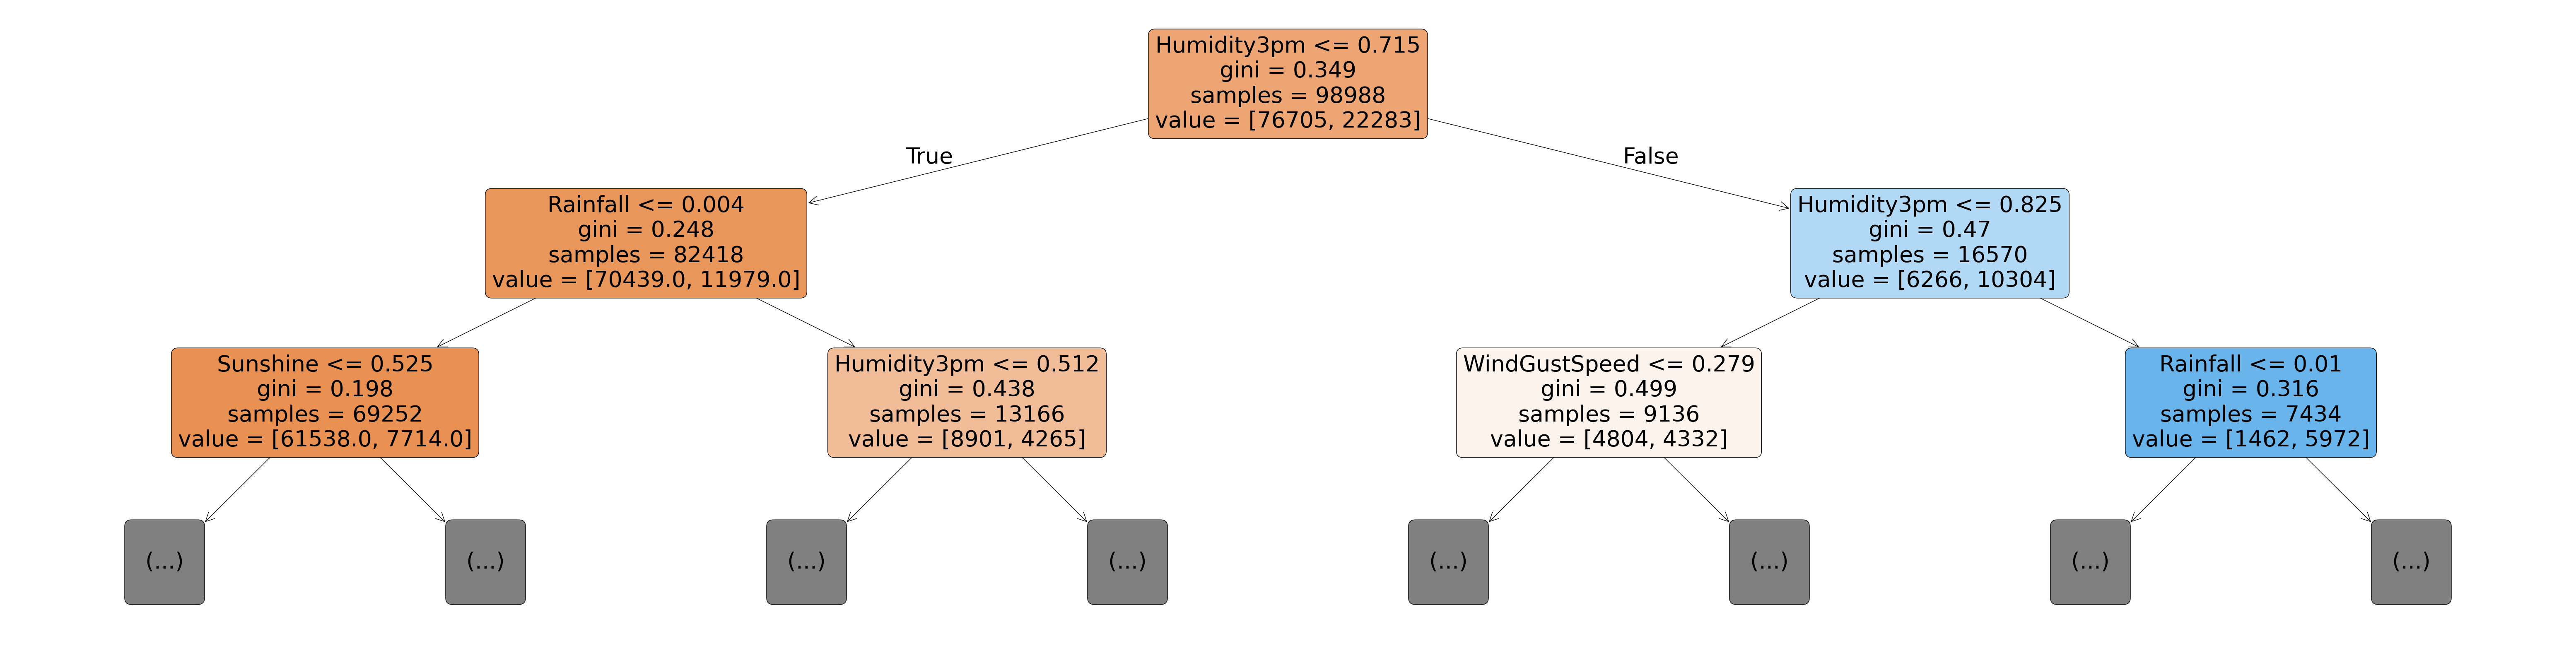

In [24]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True,max_depth=2);

In [25]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindGustDir_nan'],
      dtype='object', length=119)

In [26]:
model.feature_importances_

array([3.66441090e-02, 3.10310382e-02, 5.83819522e-02, 2.37387038e-02,
       4.94649156e-02, 5.51941381e-02, 2.93532060e-02, 2.94301916e-02,
       4.02900036e-02, 2.61249713e-01, 3.47206186e-02, 6.22707831e-02,
       1.30436036e-02, 1.82021965e-02, 3.40007853e-02, 3.16149022e-02,
       2.08646771e-03, 2.04774207e-03, 1.56258866e-03, 7.16523190e-04,
       1.46580793e-03, 1.14516033e-03, 6.78708438e-04, 1.58688858e-03,
       1.07689285e-03, 1.58303581e-03, 8.93858987e-04, 2.20380976e-03,
       1.69151319e-03, 1.50909928e-04, 9.72182640e-04, 1.34937570e-03,
       4.10087635e-04, 8.49832341e-04, 1.53724922e-03, 1.21818960e-03,
       6.92523245e-04, 6.94695483e-04, 1.88415941e-03, 2.15605818e-03,
       3.39972506e-04, 6.06680632e-04, 1.59349616e-03, 1.65494131e-03,
       1.43707559e-03, 9.17346330e-04, 6.54058930e-04, 1.73689182e-03,
       1.22662342e-03, 1.98042036e-03, 6.08433209e-04, 1.63939418e-03,
       1.17289895e-03, 1.20886240e-03, 1.30908612e-03, 4.34535366e-04,
      

In [27]:
x= pd.DataFrame({'feature':X_train.columns,'importance':model.feature_importances_}).sort_values('importance',ascending=False)

In [28]:
x.head(10)

,feature,importance
9,Humidity3pm,0.261250
11,Pressure3pm,0.062271
2,Rainfall,0.058382
5,WindGustSpeed,0.055194
4,Sunshine,0.049465
8,Humidity9am,0.040290
0,MinTemp,0.036644
10,Pressure9am,0.034721
14,Temp9am,0.034001
15,Temp3pm,0.031615


In [29]:
model2 = DecisionTreeClassifier(random_state=42,max_depth=3)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [30]:
model2.score(X_train, y_train)

0.8291308037337859

In [31]:
model2.score(X_val, y_val)

0.8334397307178921

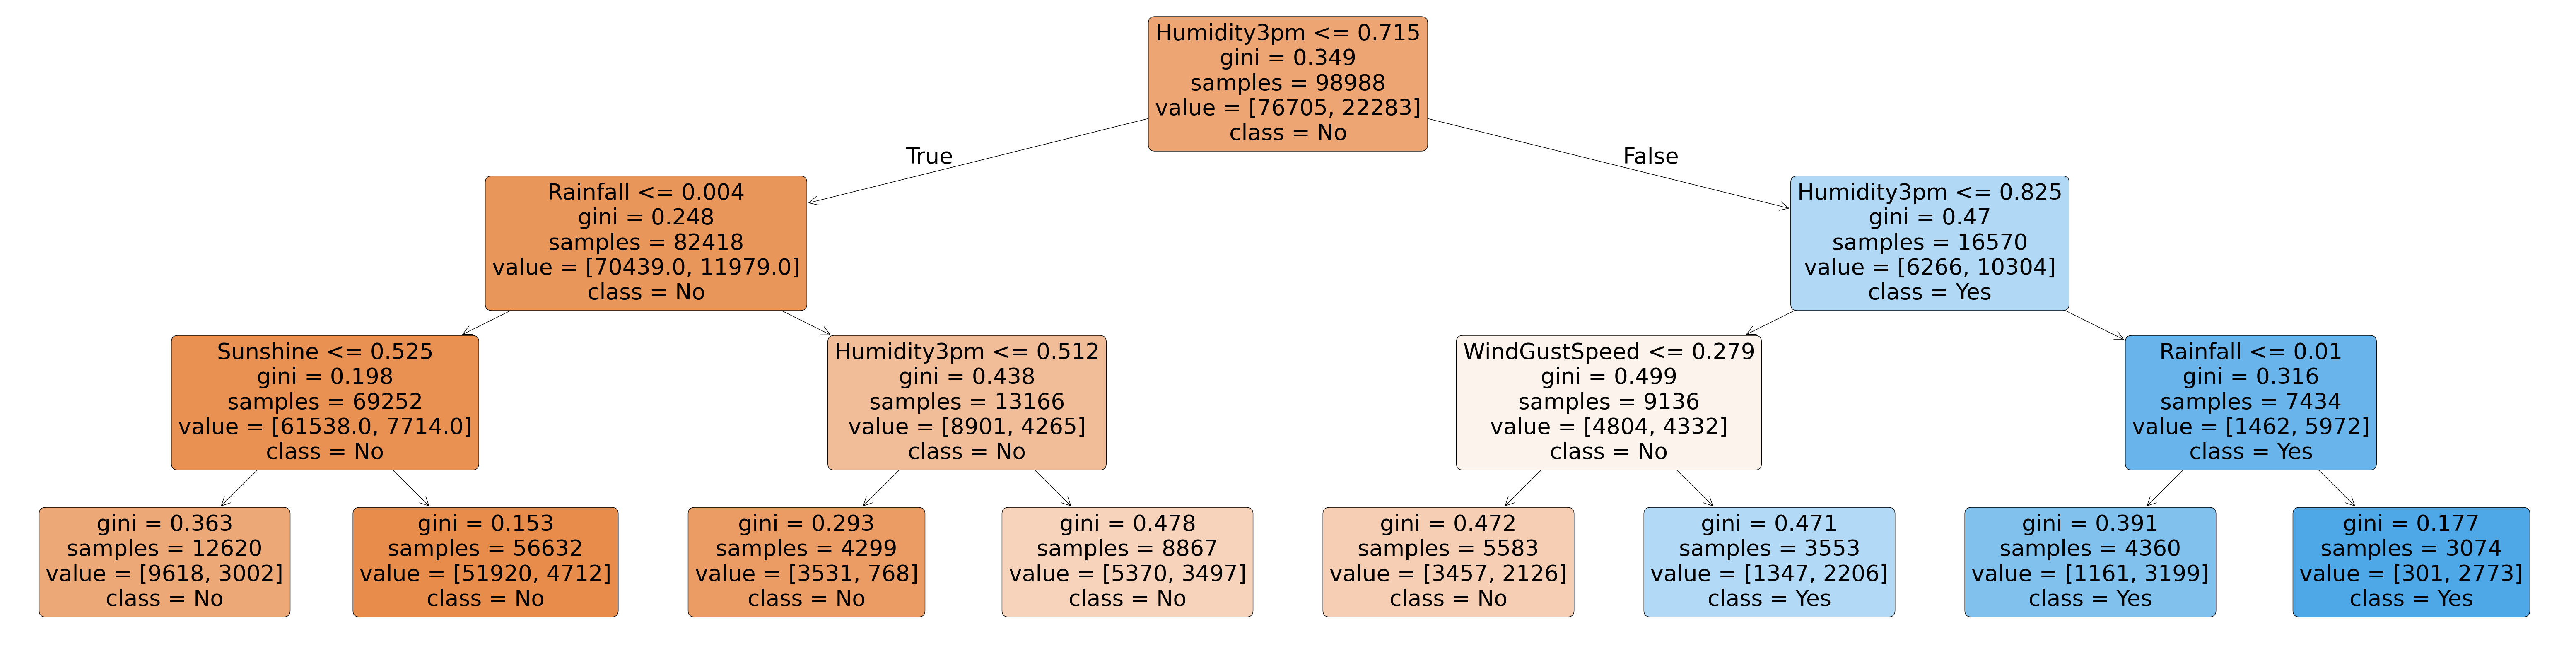

In [32]:
plt.figure(figsize=(80,20))
plot_tree(model2, feature_names=X_train.columns, filled=True, rounded=True,class_names=model2.classes_);

In [33]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, y_train)
    train_error = 1 - model.score(X_train, y_train)
    val_error = 1 - model.score(X_val, y_val)
    return {'max_depth': md, 'train_error': train_error, 'val_error': val_error}

In [34]:
import pandas as pd
max_depth_errors = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])
max_depth_errors

,max_depth,train_error,val_error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.157971
8,9,0.140906,0.156636
9,10,0.133006,0.157739


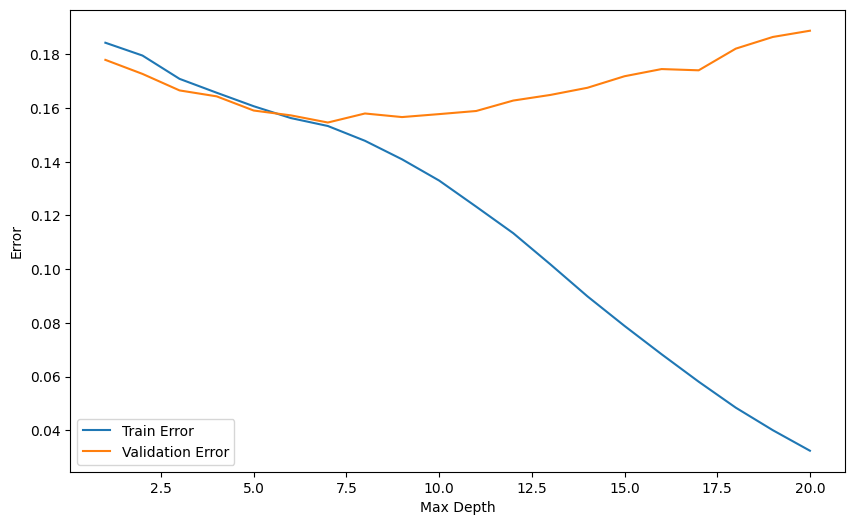

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(max_depth_errors['max_depth'], max_depth_errors['train_error'], label='Train Error')
plt.plot(max_depth_errors['max_depth'], max_depth_errors['val_error'], label='Validation Error')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.legend()
plt.show()

In [36]:
model = DecisionTreeClassifier(max_depth=7, random_state=42)
model.fit(X_train, y_train)
print(f'train: {model.score(X_train, y_train)}, val: {model.score(X_val, y_val)}')

train: 0.8466884874934335, val: 0.8453949277465034


In [37]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)
model.fit(X_train, y_train)
print(f'train: {model.score(X_train, y_train)}, val: {model.score(X_val, y_val)}')

train: 0.8480421869317493, val: 0.8442342290058615


In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1,random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [39]:
model.score(X_train, y_train)

0.9999494888269285

In [40]:
model.score(X_val, y_val)

0.8557831814752481

In [46]:
importance_df = pd.DataFrame({'feature':X_train.columns,'importance':model.feature_importances_},).sort_values('importance',ascending=False)

In [47]:
importance_df.head()

,feature,importance
9,Humidity3pm,0.135572
11,Pressure3pm,0.053231
4,Sunshine,0.052745
8,Humidity9am,0.051010
2,Rainfall,0.047548


In [48]:
base_model = RandomForestClassifier(n_jobs=-1,random_state=42)
base_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [50]:
print(f'train: {base_model.score(X_train, y_train)}, val: {base_model.score(X_val, y_val)}')

train: 0.9999494888269285, val: 0.8557831814752481


In [53]:
model = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=42)
model.fit(X_train, y_train)
print(f'train: {model.score(X_train, y_train)}, val: {model.score(X_val, y_val)}')

train: 0.9999797955307714, val: 0.8579885090824676


## 🌳 Training Decision Tree & Random Forest Models
After preprocessing, we train a Decision Tree and a Random Forest classifier to predict rainfall.

## 🏆 Conclusion
- Decision Trees provide interpretable models but may overfit.
- Random Forest models are more robust due to ensembling.
- Proper feature engineering can improve model performance further.